# Color Clustering Image Demo
**Author: Micah Webb**

### Description
Utilize OpenCV and K-Means clustering to decompose
an image into 'n' pieces.

#### Load and View the Data

(3024, 4032, 3)


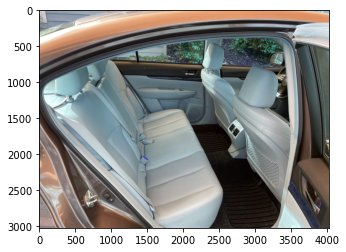

In [20]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

im = cv2.imread("./data/IMG_0539.JPG")

subimage = im #[0:100][0:100] # Use smaller image if debugging

sub_shape = subimage.shape
print(sub_shape)
plt.imshow(im)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

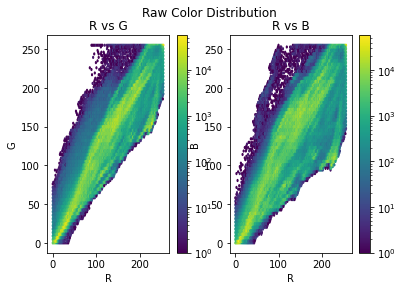

In [21]:
# Reshape to an array with 3 cols
# Then load into dataframe 
df = pd.DataFrame(subimage.reshape(-1,3))
df.columns = ['R', 'G', 'B']

#Visualize Raw data
fig, axs = plt.subplots(1,2)
df.plot(kind='hexbin', x='R', y='G', bins='log',cmap='viridis', ax=axs[0], title='R vs G')
df.plot(kind='hexbin', x='R', y='B', bins='log',cmap='viridis', ax=axs[1], title='R vs B')
fig.suptitle('Raw Color Distribution')

plt.show

#### Factor Reduction

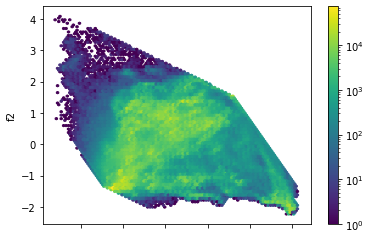

In [22]:
#Remove Correlations from the data.
from sklearn.decomposition import FactorAnalysis
X = df[['R','G','B']]

fac = FactorAnalysis(n_components=2,rotation='varimax')
out = fac.fit_transform(X)

#New DataFrame with 2 cols
df_out = pd.DataFrame(out)
df_out.columns = ['f1', 'f2'] #Outputs generic factors
df_out.plot(kind='hexbin',x='f1', y='f2', bins='log', cmap='viridis')
plt.show()

#### Clustering with MiniBatchKMeans

clustering
finished


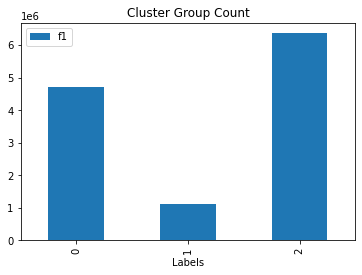

In [26]:
from sklearn.cluster import MiniBatchKMeans

n_clusters=3 #Change number of clusters here.

X_out = df_out[['f1','f2']].values #'f1','f2'
print('clustering')
clust = MiniBatchKMeans(n_clusters=n_clusters)
clust.fit(X_out)

#Append Cluster labels back to data
df_out['Labels'] = clust.labels_
print('finished')

# Plot the Count in each cluster
df_out.groupby('Labels').agg({'f1':'count'}).plot.bar(y='f1', title='Cluster Group Count')
plt.show()

#### Plot the Clusters in the Rotated Dimension 

**(Post Factor Rotation)**

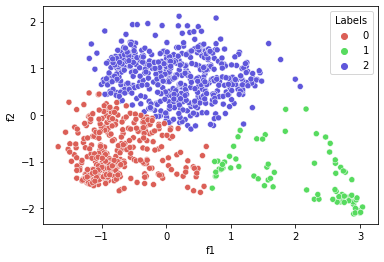

In [27]:
import seaborn as sns

cmap = sns.color_palette("hls",n_clusters)
sns.scatterplot(data=df_out.sample(n=1000), x='f1', y='f2', hue='Labels',palette=cmap)
plt.show()

#### Plot Image Before and After Clustering

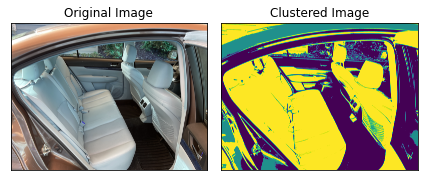

In [28]:
# Plot the Original vs Clustered Image.
#Reshape df_out to original image size.
out_image = df_out['Labels'].values.reshape(sub_shape[0],sub_shape[1],1)

fig, axs = plt.subplots(1,2)

# Plot the Old and new image
axs[0].imshow(im)
axs[1].imshow(out_image)

axs[0].set_title('Original Image')
axs[1].set_title('Clustered Image')

# Remove the Grid Lines
axs[0].xaxis.set_ticks([])
axs[1].xaxis.set_ticks([])
axs[0].yaxis.set_ticks([])
axs[1].yaxis.set_ticks([])

# Tighten the layout
plt.tight_layout()
plt.show()